# Replicate the 1D data (fixed tau, T):

In [1]:
### Import pickle for loading data
import pickle
from pathlib import Path
from config.paths import DATA_DIR
from src.spectroscopy.post_processing import extend_and_plot_results
from src.visualization.plotting import Plot_polarization_2d_spectrum, Plot_fixed_tau_T
from src.visualization import mpl_tex_settings 


Loading data from: 1d_data_tmax_1900_dt_2.0_ph4_freq1_20250602_113825.pkl
Data loaded successfully!
  tau_coh = 300.00 fs
  T_wait = 1000.00 fs
  t_det_vals: 301 points from 0.00 to 600.00 fs
  data_avg shape: (301,)
  omega_ats: 1 frequencies
  System parameters: SystemParameters(hbar=1.0, Boltzmann=1.0, atom_g=Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[1.]
 [0.]], atom_e=Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.]
 [1.]], Temp=1.0, cutoff_=1.0, N_atoms=1, ODE_Solver='Paper_eqs', RWA_laser=True, E0=0.05, pulse_FWHM=15.0, t_max=1900.0, dt=2, envelope_type='gaussian', omega_laser_cm=16000.0, Delta_cm=0, omega_A_cm=16000.0, omega_B_cm=None, mu_A=1.0, mu_B=None, J_cm=None, gamma_0=0.0033333333333333335, gamma_phi=0.01, psi_ini=Quantum object: dims=[[2], [2]], shape=(2, 2), type='oper', dtype=Dense, isherm=True
Qobj data =
[[1. 0.]
 [0. 0.]])


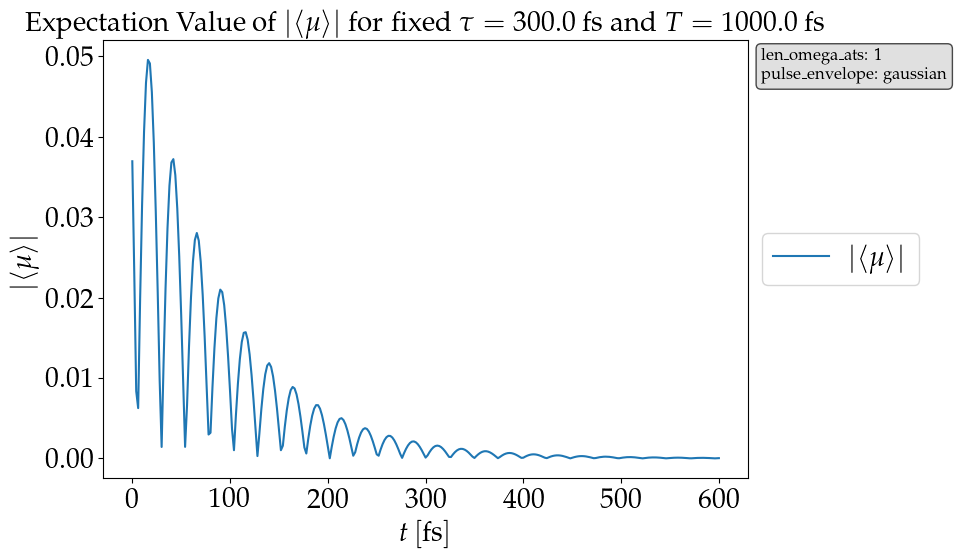

In [2]:
# =============================
# LOAD 1D SPECTROSCOPY DATA FROM PICKLE FILE
# =============================
### Find the latest 1D spectroscopy data file
data_dir = DATA_DIR / "1d_spectroscopy"
if data_dir.exists():
    pickle_files = list(data_dir.glob("1d_data_*.pkl"))
    if pickle_files:
        # Get the most recent file
        latest_file = max(pickle_files, key=lambda p: p.stat().st_mtime)
        print(f"Loading data from: {latest_file.name}")
        
        ### Load the pickle file
        with open(latest_file, 'rb') as f:
            loaded_data = pickle.load(f)
        
        # Extract the data
        t_det_vals = loaded_data['t_det_vals']
        data_avg = loaded_data['data_avg']
        tau_coh = loaded_data['tau_coh']
        T_wait = loaded_data['T_wait']
        system = loaded_data['system']
        omega_ats = loaded_data['omega_ats']
        
        print(f"Data loaded successfully!")
        print(f"  tau_coh = {tau_coh:.2f} fs")
        print(f"  T_wait = {T_wait:.2f} fs")
        print(f"  t_det_vals: {len(t_det_vals)} points from {t_det_vals[0]:.2f} to {t_det_vals[-1]:.2f} fs")
        print(f"  data_avg shape: {data_avg.shape}")
        print(f"  omega_ats: {len(omega_ats)} frequencies")
        print(f"  System parameters: {system}")
        
        # Execute the plotting function
        kwargs = {
            'tau_coh': tau_coh,
            'T_wait': T_wait,
            'len_omega_ats': len(omega_ats),
            'pulse_envelope': system.envelope_type,
        }
        
        ### PLOT THE DATA
        Plot_fixed_tau_T(
            t_det_vals, data_avg, **kwargs
        )
        
    else:
        print("❌ No 1D spectroscopy pickle files found in the data directory.")
        print(f"   Searched in: {data_dir}")
else:
    print(f"❌ Data directory does not exist: {data_dir}")
    print("   Please run the 1D spectroscopy calculation first to generate data.")